# 第一问
让你分析三个产品数据集，分析的目的是用来识别，描述和支持（数学证据，有意义的定量和/或定性模式，关系，
度量和参数（星级，评论和有用性评分之内和之间的）），这有助于Sunshine Company在三个新的在线市场产品中取得成功。


## 步骤：(想象一棵树)
1.分别对星级，评论和帮助等级讨论

2.以星级为例将星级分成几部分(1:好评, 0:中评, -1:差评)

3.以好评为例，查看给好评这些用户的评论中的高频词汇（最重要，产品的哪些功能最吸引人），产品ID（好产品的来源）

4.分析回头客的评论，看他们看重什么


最终提取出用户关心的东西, 如:产品的功能,外表,实用性,品牌等等;


# 第二问
## a)基于对阳光公司影响最大的评级(rating)和评论(review)这两个指标，确定一个数据衡量(measures)方法

	根据(星级,评论)三个标准判断用户的满意程度.星级分1-5分,划分成-1, 0, 1; 评论分-1, 0, 1;
如何描述用户满不满意呢?总的来说,星级越高,帮助等级越高,评分越高,用户越满意;可以给出一个满意程度的模型,
比如简单的将前面两个的得分加起来(暂时没想到什么好方法, 具体可能要知道textblob的具体原理)


## b)基于那些“能预测或暗示产品在市场上声誉增加或减少的”数据，来分析讨论“基于时间的度量方法(measures)和模式(patterns)”；


	从时间来看产品的声誉变化, 这里的数据有十多年,选择的时间段应该是月份或者年份.
从第一问得到用户的满意程度,观察满意程度随时间变化即可.横坐标:时间(单位:年/月份);纵坐标:满意程度(单位:1)
	

## c)以寻找一个“暗示或预示产品的成功或失败的”**潜在性**的方法为目的，确定一套“基于文本(text-based)和评级(rating-based)的综合度量方法”；

	确定文本(text-based)和评级(rating-based)之间的最佳权重,来预测产品是否会成功.初步的想法是用这两个指标,通过决策树模型拟合,
计算重要程度,把重要程度作为权重.产品成败的潜在性就看销量增加还是减少.
	
## d)特定的星级是否会引起更多的评论？例如，客户看到一连串的差评，他是否会更倾向于写一个差评呢？
	根据时间段, 分析星级对接下来的评论的影响.查看有连续差评的时间段中的评论


## e)特定质量的文本评论(text-based reviews)是否和评级(rating)有强关联性呢？例如，“对产品很满意！”，“对产品很失望！”
	特定文本是否与评级有很强的关联.看给出高评分的的用户的评论中的高频词汇.


# 第三问
根据上面的分析写一个总结,内容可能包括:
1.用户最在意的是什么.进一步的有,商品如何命名,产品如何改进
2.如何评定用户的满意程度
3.如何杜绝恶意的评论

In [1]:
import pandas as pd
%pylab
%matplotlib inline
import seaborn as sns
sns.set()

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("D:/anydata/data/hair_dryer.tsv", sep='\t')

In [3]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,5,0,0,N,Y,Works great,Works great!,8/31/2015
1,US,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,Beauty,4,0,0,N,Y,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po...",8/31/2015
2,US,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,Beauty,5,0,1,N,Y,Five Stars,Love this dryer!,8/31/2015
3,US,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,Beauty,5,0,0,N,Y,Five Stars,styling hair in style,8/31/2015
4,US,107098,R35BHQJHXXJD59,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,4,0,0,N,N,I think's great. The cord length is perfect,I just got this last week. I think's great. Th...,8/31/2015


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11470 entries, 0 to 11469
Data columns (total 15 columns):
marketplace          11470 non-null object
customer_id          11470 non-null int64
review_id            11470 non-null object
product_id           11470 non-null object
product_parent       11470 non-null int64
product_title        11470 non-null object
product_category     11470 non-null object
star_rating          11470 non-null int64
helpful_votes        11470 non-null int64
total_votes          11470 non-null int64
vine                 11470 non-null object
verified_purchase    11470 non-null object
review_headline      11468 non-null object
review_body          11470 non-null object
review_date          11470 non-null object
dtypes: int64(5), object(10)
memory usage: 1.3+ MB


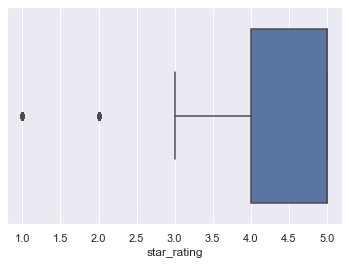

In [7]:
# 星级
sns.boxplot(x=df["star_rating"], data = df)

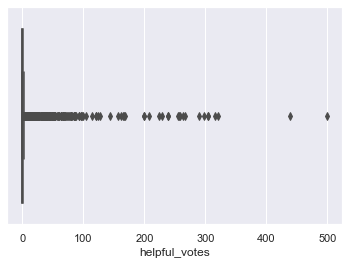

In [8]:
sns.boxplot(x=df["helpful_votes"], data = df)

In [9]:
# 将标题和主体部分合并
df["review"] = df.review_headline + " " + df.review_body

In [10]:
import re
stopwords_list = [line.rstrip() for line in open('D:/anydata/data/baidu_stopword.txt')]
def clean_text(text):
    text=re.sub('[^a-zA-Z]',' ',str(text)) #只要字母，去掉符号
    words=text.lower().split()
    
    words=[w for w in words if w not in stopwords_list]
    return ' '.join(words)

In [11]:
df['clean_review'] = df.review.apply(clean_text)

In [12]:
df['clean_review'].head()

0                              works great works great
1    i love travel blow dryers easy lift dries hair...
2                                     stars love dryer
3                             stars styling hair style
4    i s great cord length perfect i week i s great...
Name: clean_review, dtype: object

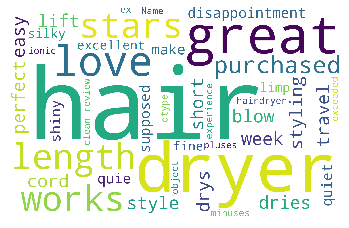

In [13]:
from wordcloud import WordCloud
wordcloud = WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        width=1500,              #设置图片的宽度
        height=960,              #设置图片的高度
        margin=10               #设置图片的边缘
        ).generate(str(df.clean_review))
plt.imshow(wordcloud)
plt.axis("off")

wordcloud.to_file("hairdryer.png")

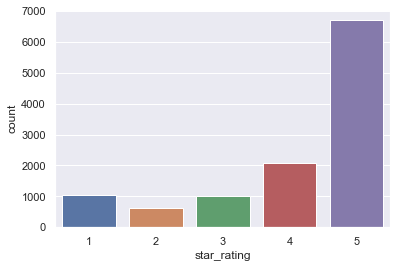

In [14]:
sns.countplot(x='star_rating', data=df)

In [15]:
# df.review_date.value_counts()

In [16]:
df.loc[df['star_rating'] < 3, 'star_rating'] = -1
df.loc[df['star_rating'] == 3, 'star_rating'] = 0
df.loc[df['star_rating'] > 3, 'star_rating'] = 1

In [17]:
df.star_rating.value_counts()

 1    8800
-1    1671
 0     999
Name: star_rating, dtype: int64

In [18]:
from textblob import TextBlob 

def get_sentiment(text): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(text) 
    return np.sign(analysis.sentiment.polarity)

In [19]:
df['review_sentiment'] = df.clean_review.apply(get_sentiment)

In [20]:
df.review_sentiment.value_counts()

 1.0    9471
-1.0    1276
 0.0     723
Name: review_sentiment, dtype: int64

In [21]:
def get_year(date):
    return date.split("/")[-1]

In [22]:
df['review_year'] = df.review_date.apply(get_year)

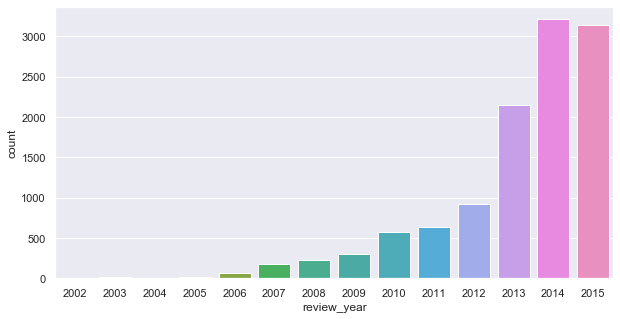

In [23]:
# 销量
plt.figure(figsize=(10,5))
sns.countplot(x="review_year", data=df)

In [35]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review,clean_review,review_sentiment,review_year,review_month
0,US,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,1,0,0,N,Y,Works great,Works great!,8/31/2015,Works great Works great!,works great works great,1.0,2015,8/2015
1,US,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,Beauty,1,0,0,N,Y,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po...",8/31/2015,I love travel blow dryers because they are eas...,i love travel blow dryers easy lift dries hair...,1.0,2015,8/2015
2,US,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,Beauty,1,0,1,N,Y,Five Stars,Love this dryer!,8/31/2015,Five Stars Love this dryer!,stars love dryer,1.0,2015,8/2015
3,US,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,Beauty,1,0,0,N,Y,Five Stars,styling hair in style,8/31/2015,Five Stars styling hair in style,stars styling hair style,0.0,2015,8/2015
4,US,107098,R35BHQJHXXJD59,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,1,0,0,N,N,I think's great. The cord length is perfect,I just got this last week. I think's great. Th...,8/31/2015,I think's great. The cord length is perfect I ...,i s great cord length perfect i week i s great...,1.0,2015,8/2015


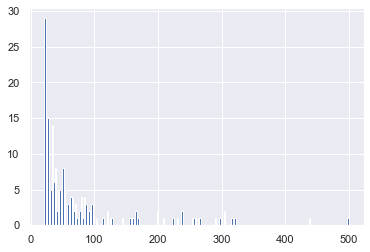

In [57]:
# 有用票大于 100 的分布
df.helpful_votes[df.helpful_votes > 20].hist(bins = 200)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review,clean_review,review_sentiment,review_year,review_month
0,US,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,1,0,0,N,Y,Works great,Works great!,8/31/2015,Works great Works great!,works great works great,1.0,2015,8/2015
1,US,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,Beauty,1,0,0,N,Y,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po...",8/31/2015,I love travel blow dryers because they are eas...,i love travel blow dryers easy lift dries hair...,1.0,2015,8/2015
2,US,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,Beauty,1,0,1,N,Y,Five Stars,Love this dryer!,8/31/2015,Five Stars Love this dryer!,stars love dryer,1.0,2015,8/2015
3,US,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,Beauty,1,0,0,N,Y,Five Stars,styling hair in style,8/31/2015,Five Stars styling hair in style,stars styling hair style,0.0,2015,8/2015
4,US,107098,R35BHQJHXXJD59,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,1,0,0,N,N,I think's great. The cord length is perfect,I just got this last week. I think's great. Th...,8/31/2015,I think's great. The cord length is perfect I ...,i s great cord length perfect i week i s great...,1.0,2015,8/2015


In [68]:
df.corr()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,review_sentiment
customer_id,1.000000,-0.004562,-0.054579,0.052799,0.052719,-0.013394
product_parent,-0.004562,1.000000,-0.008202,0.003682,0.005726,-0.019499
star_rating,-0.054579,-0.008202,1.000000,-0.041623,-0.056344,0.403904
helpful_votes,0.052799,0.003682,-0.041623,1.000000,0.995219,-0.009595
total_votes,0.052719,0.005726,-0.056344,0.995219,1.000000,-0.016093
review_sentiment,-0.013394,-0.019499,0.403904,-0.009595,-0.016093,1.000000


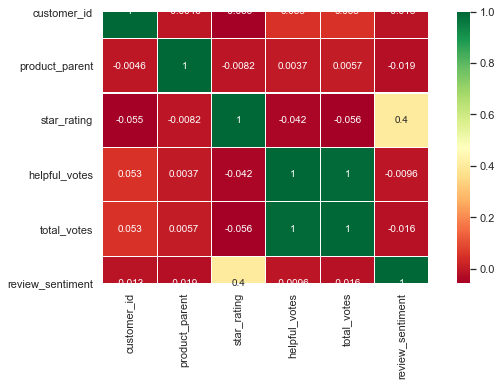

In [69]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0,square=True, cmap='RdYlGn', linecolor='white',annot=True)

In [71]:
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'review',
       'clean_review', 'review_sentiment', 'review_year', 'review_month'],
      dtype='object')

In [72]:
df.product_id.value_counts()

B003V264WW    587
B0009XH6TG    555
B00132ZG3U    535
B00005O0MZ    424
B000R80ZTQ    321
             ... 
B000S92RF4      1
B003IHQ4LG      1
B004V6WWL4      1
B00116VG0K      1
B000VKV28S      1
Name: product_id, Length: 538, dtype: int64